In [1]:
# Imports.
import math
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches # For graph colours
import statsmodels.formula.api as sm # for training a linear regression model.
import seaborn as sns # For making correlation matrices
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # for making confusion martrices Note: Not needed.
from sklearn.metrics import accuracy_score # Prediction accuracy: (tp + tn) / total
from sklearn.metrics import precision_score # Computing precision: tp / (tp + fp)
from sklearn.metrics import recall_score # Recall Score: tp / (tp + fn)
from sklearn.metrics import f1_score # F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import tree

#For showing plots directly in the notebook run the command below
%matplotlib inline
%config IPCompleter.greedy=True

# Prevents tables from being truncated.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

F:\Soft\anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read csv file into a dataframe.
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.select_dtypes(['object']).describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


By preliminary analysis:<br>
 - if features are of data type float or int, put them in a list called "continuous_features". 
 - If they are of data type object, convert them to categorical and put them in a list called "categorical_features".
 - The **Id** column has doesn't contain any useful information. Therefore, we dropped it here.

In [8]:
# Id is the index of the dataset, doesn't contain any useful information. Therefore, we dropped it here.
df = df.drop('Id',axis=1)

In [9]:
# Convert features of type 'object' to type 'category'
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')

# Make list of categorical columns
categorical_features = df.select_dtypes(['category']).columns.tolist()

# Make list of continuous columns
continuous_features = df.select_dtypes(['int', 'float64']).columns.tolist()

In [10]:
# Number of features
print("Total number of features: ", len(df.columns))
print("Number of continuous: ", len(continuous_features))
print("Number of categorical: ", len(categorical_features))

Total number of features:  80
Number of continuous:  3
Number of categorical:  43


In [11]:
# Finiding duplicates:
print("Duplicate columns: ")
print(df.columns.size - df.columns.unique().size)

print("Duplicate rows:")
print(df.duplicated()[df.duplicated() == True].shape[0])

Duplicate columns: 
0
Duplicate rows:
0


In [12]:
# Checking for constant columns

# Print count of unique values for 'continuous_column'
print("\n-Continuous Columns-\n")
print("{0:30}{1:<15}".format("Feature", "UniqueValues"))
for column in continuous_features:
    print("{0:30}{1:<15}".format(column, len(df[column].unique())))
    
print("\n-Categorical Columns-\n")
print("{0:30}{1:<15}".format("Feature", "UniqueValues"))

# Print count of unique values for 'categorical_columns'
for column in categorical_features:
    print("{0:30}{1:<15}".format(column, len(df[column].unique())))


-Continuous Columns-

Feature                       UniqueValues   
LotFrontage                   111            
MasVnrArea                    328            
GarageYrBlt                   98             

-Categorical Columns-

Feature                       UniqueValues   
MSZoning                      5              
Street                        2              
Alley                         3              
LotShape                      4              
LandContour                   4              
Utilities                     2              
LotConfig                     5              
LandSlope                     3              
Neighborhood                  25             
Condition1                    9              
Condition2                    8              
BldgType                      5              
HouseStyle                    8              
RoofStyle                     6              
RoofMatl                      8              
Exterior1st                   15 

In [13]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


No constant columns in dataset. However, the continuous feature list does contain a number of features with low numbers of unique values.

In [14]:
# Features in the continuous list with low counts
low_count_continuous = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MiscVal',
                        'MoSold', 'YrSold']

for column in low_count_continuous:
    print("{0:20} {1}".format(column, pd.unique(df[column].ravel())))

MSSubClass           [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual          [ 7  6  8  5  9  4 10  3  1  2]
OverallCond          [5 8 6 7 4 2 3 9 1]
BsmtFullBath         [1 0 2 3]
BsmtHalfBath         [0 1 2]
FullBath             [2 1 3 0]
HalfBath             [1 0 2]
BedroomAbvGr         [3 4 1 2 0 5 6 8]
KitchenAbvGr         [1 2 3 0]
TotRmsAbvGrd         [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces           [0 1 2 3]
GarageCars           [2 3 1 0 4]
PoolArea             [  0 512 648 576 555 480 519 738]
MiscVal              [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
MoSold               [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold               [2008 2007 2006 2009 2010]


Most of these values are continuous but low value. 

- **MSSubClass** (Nominal): Identifies the type of dwelling involved in the sale.	

```
020	1-STORY 1946 & NEWER ALL STYLES
030	1-STORY 1945 & OLDER
040	1-STORY W/FINISHED ATTIC ALL AGES
045	1-1/2 STORY - UNFINISHED ALL AGES
050	1-1/2 STORY FINISHED ALL AGES
060	2-STORY 1946 & NEWER
070	2-STORY 1945 & OLDER
075	2-1/2 STORY ALL AGES
080	SPLIT OR MULTI-LEVEL
085	SPLIT FOYER
090	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES
```
- **MoSold** means Month Sold. Month sold is a finite set of values that contains twelve possiblities, therefore it is a categorical feature.

- **OverallQual** means overall quality. OverallQual is a finite set of values that contains ten possiblities, therefore it is a categorical feature.

- **OverallCond** means overall condition. OverallCond is a finite set of values that contains nine possiblities, therefore it is a categorical feature.

Conclusion:<br> **MSSubClass, MoSold, OverallQual** and **OverallCond** should be removed from the continuous features.

In [15]:
# Remove from continuous list
remove_from_continuous = ['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond']
continuous_features = [x for x in continuous_features if x not in remove_from_continuous]

In [16]:
# Add to categorical
categorical_features.extend(remove_from_continuous)

# 2 - Initial Findings

## Continuous Features

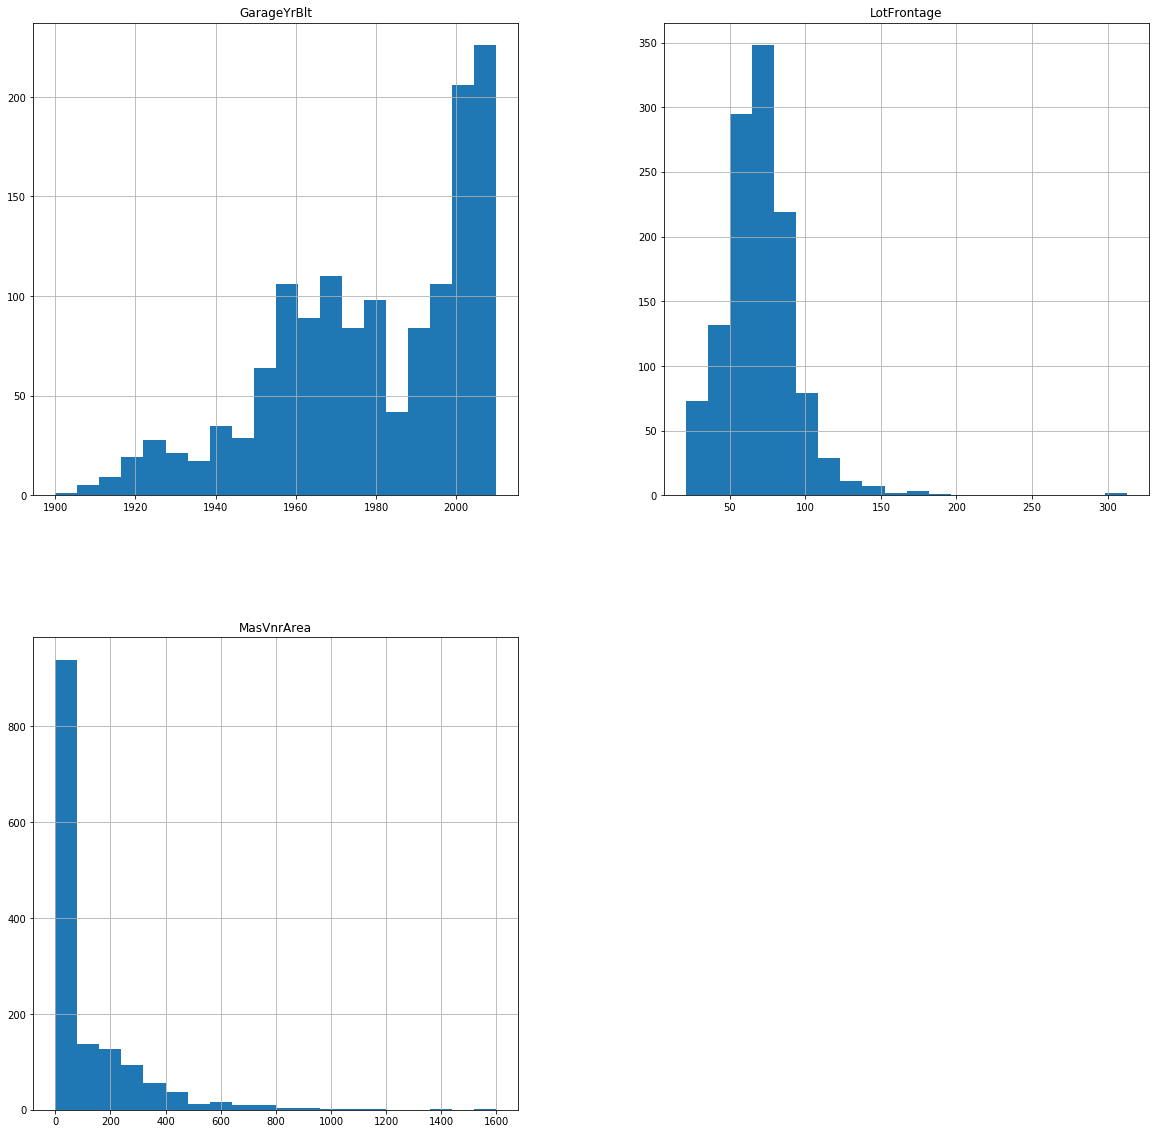

In [17]:
# Plot a histogram of the continuous features.
df[continuous_features].hist(figsize=(20,20), bins=20)
plt.show()

Several features have a huge count of a single value and a very small number of other values. These features may have to be excluded from the dataset. Features of note in this regard are:

* 3SsnPorch
* BsmtFinSF2
* BsmtHalfBath
* EnclosedPorch
* KitchenAbvGr
* LowQualFinSF
* MiscVal
* PoolArea
* ScreenPorch

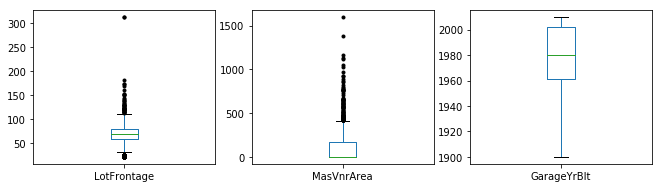

In [18]:
# Plot box plots for all the continuous features
# Note: seaborn combined with matplotlib hide fliers (outliers). To avoid this, add sym="k." to the parameters
df[continuous_features].plot(kind='box', figsize=(15,30), subplots=True, layout=(9,4), sym="k.")
plt.show()

A few features appear to have extreme outliers that may have to be examined. These include:

* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* BsmtFullBath
* KitchenAbvGr
* EnclosedPorch
* PoolArea
* MiscVal

## Outliers

The following are the biggest ten values of the features identified to have outliers above:

In [19]:
# Searching for outliers - Upper tail
outliers = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'BsmtFullBath', 'KitchenAbvGr', 
            'EnclosedPorch', 'PoolArea', 'MiscVal']

# Code Source: Stackexchange - Zelazny7
# https://stackoverflow.com/questions/20477190/get-top-biggest-values-from-each-column-of-the-pandas-dataframe
def sorted(s, num):
    tmp = s.sort_values(ascending=False)[:num]  # earlier s.order(..)
    tmp.index = range(num)
    return tmp

df[outliers].apply(lambda x: sorted(x, 10)).T.round(2)

,0,1,2,3,4,5,6,7,8,9
LotFrontage,313.0,313.0,182.0,174.0,174.0,168.0,160.0,153.0,152.0,150.0
LotArea,215245.0,164660.0,159000.0,115149.0,70761.0,63887.0,57200.0,53504.0,53227.0,53107.0
BsmtFinSF1,5644.0,2260.0,2188.0,2096.0,1904.0,1880.0,1810.0,1767.0,1721.0,1696.0
TotalBsmtSF,6110.0,3206.0,3200.0,3138.0,3094.0,2633.0,2524.0,2444.0,2396.0,2392.0
1stFlrSF,4692.0,3228.0,3138.0,2898.0,2633.0,2524.0,2515.0,2444.0,2411.0,2402.0
BsmtFullBath,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
KitchenAbvGr,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
EnclosedPorch,552.0,386.0,330.0,318.0,301.0,294.0,293.0,291.0,286.0,280.0
PoolArea,738.0,648.0,576.0,555.0,519.0,512.0,480.0,0.0,0.0,0.0
MiscVal,15500.0,8300.0,3500.0,2500.0,2000.0,2000.0,2000.0,2000.0,1400.0,1300.0


In [20]:
print("\nContinuous Features with outliers > 1.5 * upper 3rd quartile:\n")

print("{0:20} {1}".format('feaure', 'Max Value'))
print("-"*50)

for i in outliers:
    if df[i].max() > (df[i].quantile(.75) * 1.5):
        print("{0:20} {1}".format(i, df[i].max()))


Continuous Features with outliers > 1.5 * upper 3rd quartile:

feaure               Max Value
--------------------------------------------------
LotFrontage          313.0
LotArea              215245
BsmtFinSF1           5644
TotalBsmtSF          6110
1stFlrSF             4692
BsmtFullBath         3
KitchenAbvGr         3
EnclosedPorch        552
PoolArea             738
MiscVal              15500


## Categorical Features

In [21]:
# Unique values in categorical_columns
print("\nCategorical columns unique values:")
print("-"*100)

for column in categorical_features:
    print("{0:20} {1}".format(column, pd.unique(df[column].ravel())))


Categorical columns unique values:
----------------------------------------------------------------------------------------------------
MSZoning             ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street               ['Pave' 'Grvl']
Alley                [nan 'Grvl' 'Pave']
LotShape             ['Reg' 'IR1' 'IR2' 'IR3']
LandContour          ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities            ['AllPub' 'NoSeWa']
LotConfig            ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope            ['Gtl' 'Mod' 'Sev']
Neighborhood         ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1           ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2           ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType             ['1Fam' '2fmCon' 'Duplex' 'TwnhsE'

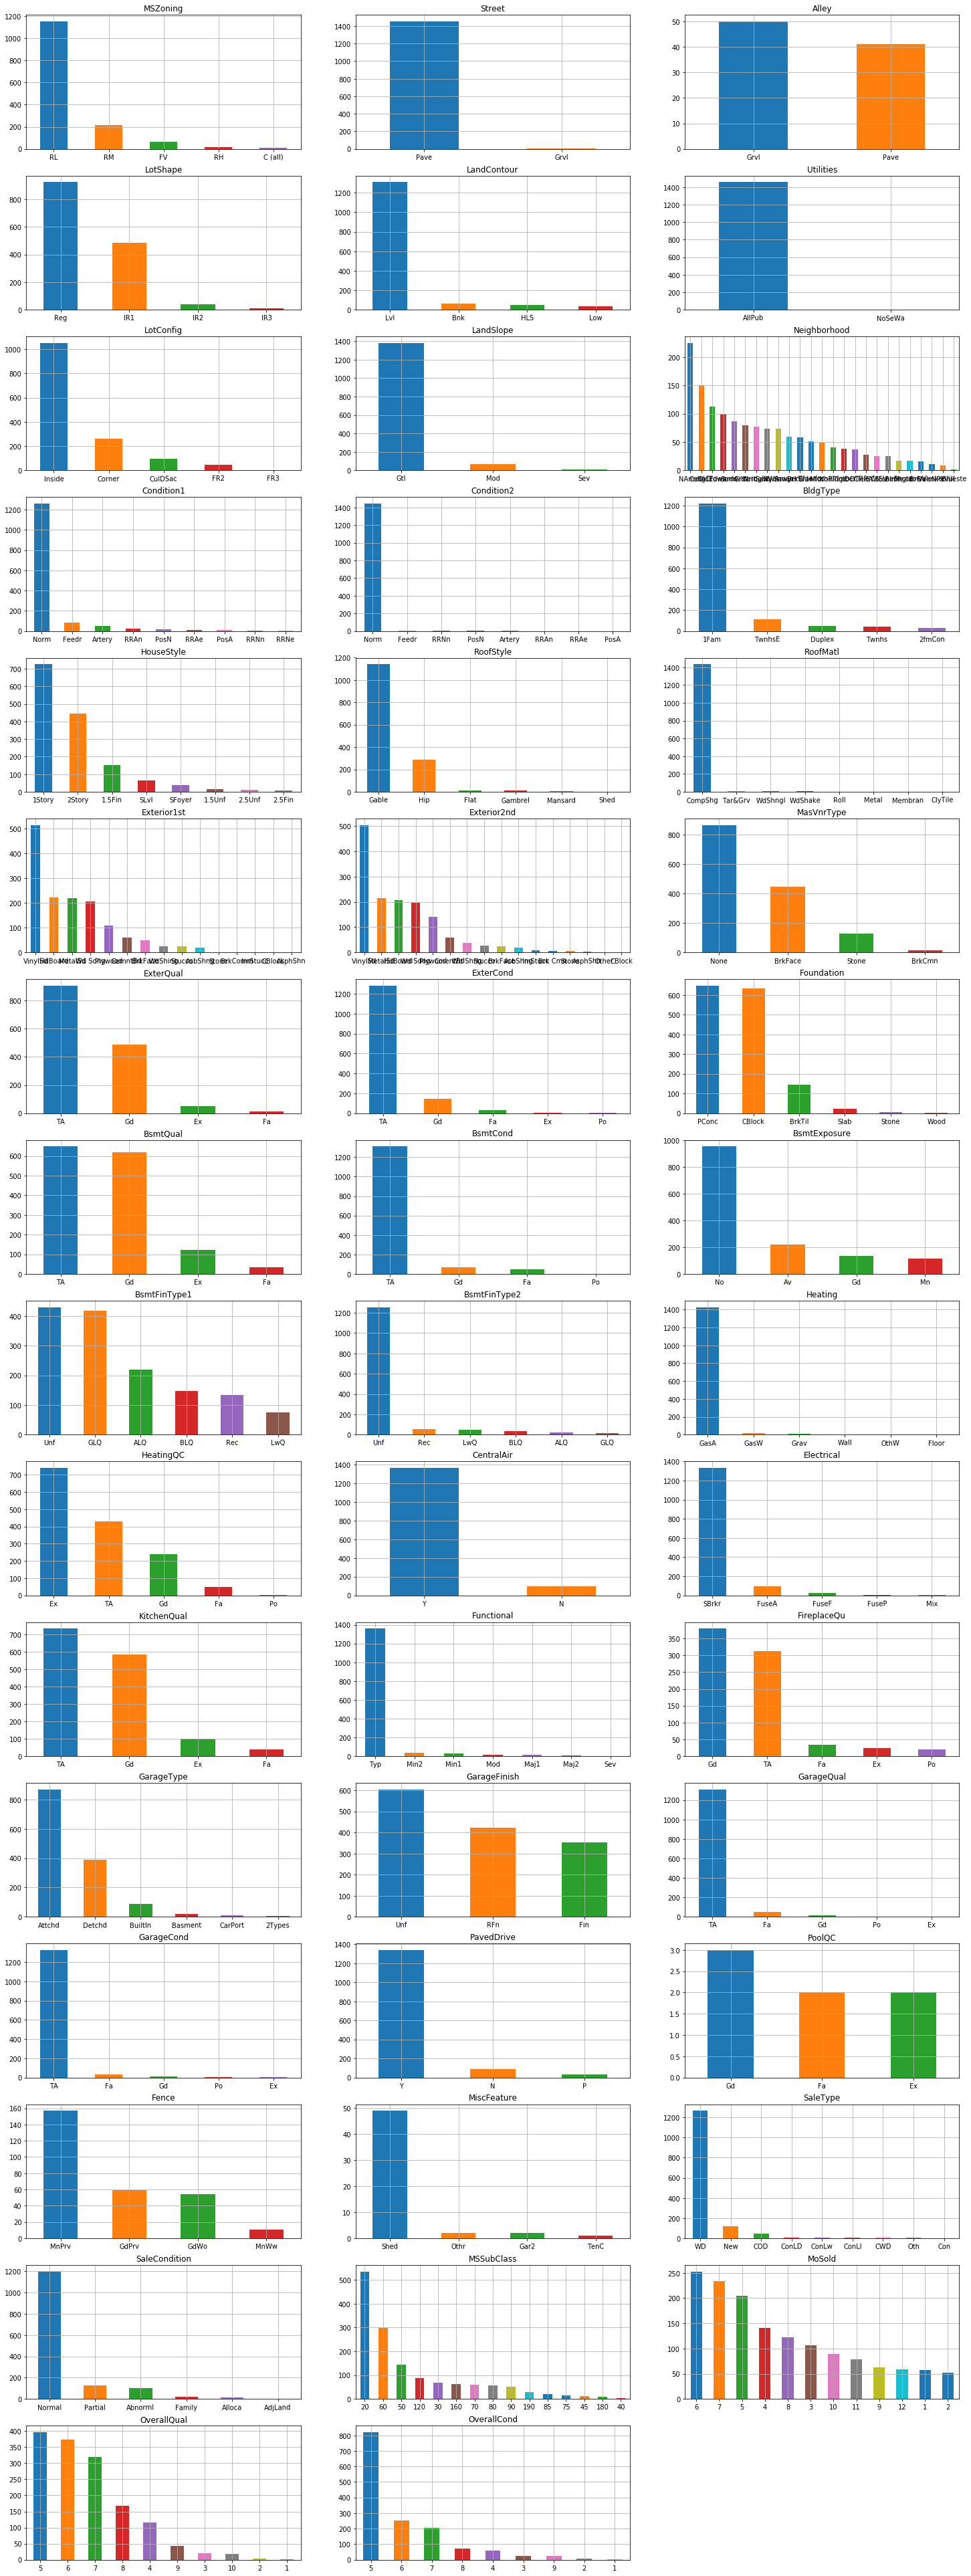

In [22]:
# Plot bar plots for all the categorical features
# Shape of categorical datasets is as follows:
fig, axes = plt.subplots(nrows=16, ncols=3, figsize=(25,70))
fig.subplots_adjust(hspace = 0.2)

axes_list = [item for sublist in axes for item in sublist]

for feature in categorical_features:
    ax = axes_list.pop(0)
    df[feature].value_counts().plot(kind='bar', ax=ax, grid=True, rot=1)
    ax.set_title(feature)

for ax in axes_list:
    ax.remove()

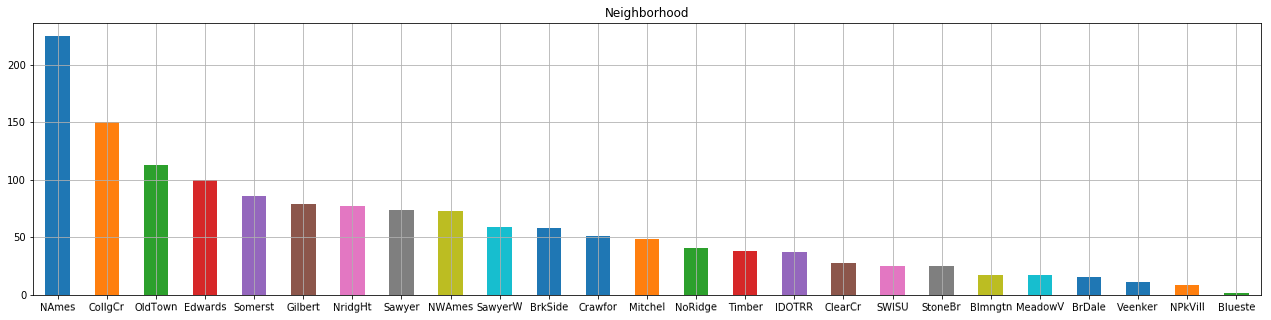

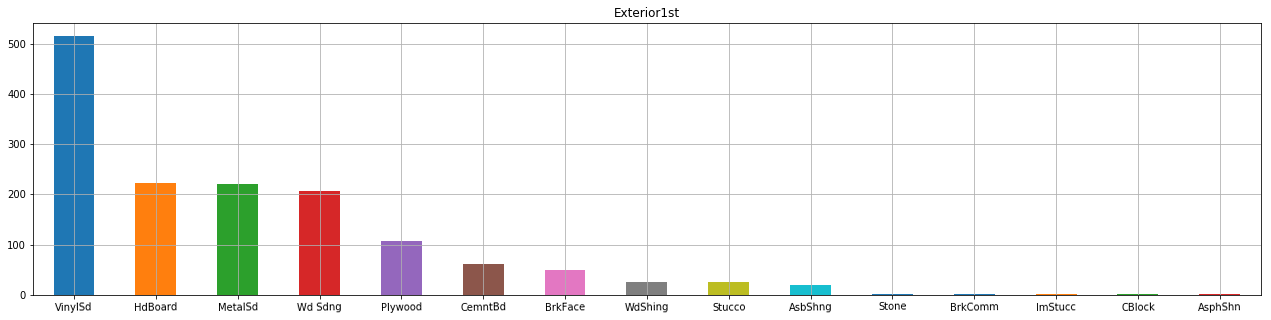

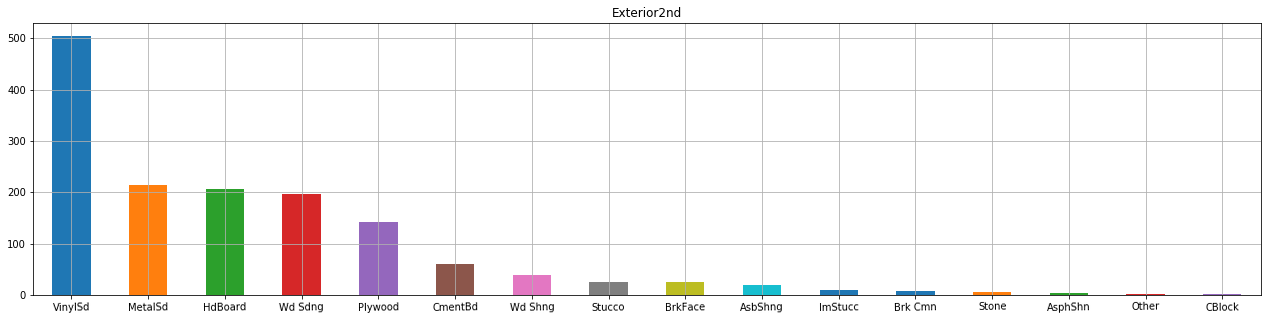

In [23]:
# The X axis labels on three of the above are hard to make out:
bigger_barcharts = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for feature in bigger_barcharts:
    df[feature].value_counts().plot(kind='bar', grid=True, rot=1, title=feature, figsize=(22,5))
    plt.show()

#### Low levels of variance

The following features had a very large number of a particular value and a very small number of other values:

```
['Street', 'LandContour', 'Utilities', 'LandSlope', 'RoofMatl', 'ExterCond', 'BsmtCond', 
 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 
 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
```
#### Duplicate features?

What is the difference between the following features?
* Street & Ally  
_**Answer:** Street is the type of road access while Alley is the type of alley access._

* Condition1 & Condition2  
_**Answer:** Condition1 is the proximity to main road or railroad Condition2 is proximity to a 2nd main road or railroad (if there is more than one nearby)_

* Exterior1st & Exterior2nd  
_**Answer:** Exterior1st is the exterior covering on house, while Exterior2nd is the 2nd exterior covering on house (if more than one material)_

* BsmtFinType1 & BsmtFinType2  
_**Answer:** BsmtFinType1 is the quality of basement finished area, while BsmtFinType2 is the quality of second finished area (if present)._

* BsmtFinSF, BsmtFinSF1 & BsmtFinSF2  
_**Answer:** BsmtUnfSF is the unfinished square feet of basement area, BsmtFinSF1 is type 1 finished square feet and BsmtFinSF2 is type 2 finished square feet_

#### Nominal Categorical Features

```
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 
 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 
 'MSSubClass']
 ```
 
#### Ordinal Categorical Features

```
['LandSlope', 'Condition1', 'Condition2', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'MoSold', 'OverallQual', 'OverallCond']
```

#### Binary Features

Utilities
Ally
CentralAir
PavedDrive - has unknown 3rd value 'P' in there too though!

## Null Values Counts

Below is the print out of categorical columns which have nan values.

In [24]:
hasNaN=[]
for c  in df.columns:
    if df[c].isnull().sum() > 0:
        hasNaN.append(c)
        print(c," missing values count:",df[c].isnull().sum())
    

LotFrontage  missing values count: 259
Alley  missing values count: 1369
MasVnrType  missing values count: 8
MasVnrArea  missing values count: 8
BsmtQual  missing values count: 37
BsmtCond  missing values count: 37
BsmtExposure  missing values count: 38
BsmtFinType1  missing values count: 37
BsmtFinType2  missing values count: 38
Electrical  missing values count: 1
FireplaceQu  missing values count: 690
GarageType  missing values count: 81
GarageYrBlt  missing values count: 81
GarageFinish  missing values count: 81
GarageQual  missing values count: 81
GarageCond  missing values count: 81
PoolQC  missing values count: 1453
Fence  missing values count: 1179
MiscFeature  missing values count: 1406


By looking at the missing value count above, the columns **Alley, FireplaceQu, PoolQC, Fence, MiscFeature** have too many missing values that might lose too much information. It may need to be dropped.

Where the number of null values is less than a hundred, the issue may be resolved by imputation. However, features missing higher numbers than this may need to be discarded. This will be dealt with on a feature by feature basis in the data cleaning section (Section 3).

## Mode Counts

In [25]:
# Mode - continuous features
print("\nContinuous features Mode Counts:")
print("-"*55)

print("{0:30} {1:<8} {2:<8} {3:<9}".format("Feature", "Mode", "Count", "%"))
print("-"*55)

for feature in continuous_features:
    feature_mode = df[feature].mode().iloc[0]
    mode_count = df[feature].value_counts()[feature_mode]
    print("{0:30} {1:<8.2f} {2:<8d} {3:<8.1f}".format(feature, feature_mode, mode_count, (mode_count/df[column].count())*100))

# Mode - continuous features
print("\nCategorical features Mode Counts:")
print("-"*55)

print("{0:30} {1:<8} {2:<8} {3:<9}".format("Feature", "Mode", "Count", "%"))
print("-"*55)

for feature in categorical_features:
    feature_mode = df[feature].mode().iloc[0]
    mode_count = df[feature].value_counts()[feature_mode]
    print("{0:30} {1:<10} {2:<8d} {3:<8.1f}".format(feature, feature_mode, mode_count, (mode_count/df[column].count())*100))



Continuous features Mode Counts:
-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
LotFrontage                    60.00    143      9.8     
MasVnrArea                     0.00     861      59.0    
GarageYrBlt                    2005.00  65       4.5     

Categorical features Mode Counts:
-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
MSZoning                       RL         1151     78.8    
Street                         Pave       1454     99.6    
Alley                          Grvl       50       3.4     
LotShape                       Reg        925      63.4    
LandContour                    Lvl        1311     89.8    
Utilities                      AllPub     1459     99.9    
LotConfig                      Inside     1052     72.1

#### High Mode Count Features

There are a large number of features with a high percentage of a single value:

```
Continuous features

-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
BsmtFinSF2                     0.00     1293     88.6 
LowQualFinSF                   0.00     1434     98.2 
BsmtHalfBath                   0.00     1378     94.4 
KitchenAbvGr                   1.00     1392     95.3
EnclosedPorch                  0.00     1252     85.8    
3SsnPorch                      0.00     1436     98.4    
ScreenPorch                    0.00     1344     92.1    
PoolArea                       0.00     1453     99.5    
MiscVal                        0.00     1408     96.4 

Categorical features

-------------------------------------------------------
Feature                        Mode     Count    %        
-------------------------------------------------------
MSZoning                       RL         1151     78.8    
Street                         Pave       1454     99.6 
LandContour                    Lvl        1311     89.8    
Utilities                      AllPub     1459     99.9    
LotConfig                      Inside     1052     72.1    
LandSlope                      Gtl        1382     94.7  
Condition1                     Norm       1260     86.3    
Condition2                     Norm       1445     99.0    
BldgType                       1Fam       1220     83.6   
RoofStyle                      Gable      1141     78.2    
RoofMatl                       CompShg    1434     98.2    
ExterCond                      TA         1282     87.8    
BsmtCond                       TA         1311     89.8    
BsmtFinType2                   Unf        1256     86.0    
Heating                        GasA       1428     97.8    
CentralAir                     Y          1365     93.5    
Electrical                     SBrkr      1334     91.4    
Functional                     Typ        1360     93.2    
GarageQual                     TA         1311     89.8    
GarageCond                     TA         1326     90.8    
PavedDrive                     Y          1340     91.8    
SaleType                       WD         1267     86.8    
SaleCondition                  Normal     1198     82.1
```
Many of these features are nearly constant values and therefore likely have little predictive power.


# 3 - Resolving Data Quality Issues

### Outliers

Several features have a huge count of a single value and a very small number of other values:

* 3SsnPorch
* BsmtFinSF2
* BsmtHalfBath
* EnclosedPorch
* KitchenAbvGr
* LowQualFinSF
* MiscVal
* PoolArea
* ScreenPorch

By inspecting the histogram plot above, we have concluded that all these fetures make sense. Single values are generally low values like 0, which indicate an absence of that feature. 

For e.g. 
- **BsmtFinSF2** - basement finished square foot, has many values at 0, meaning that that house does not have finished the basement. 
- **KitchenAbvGr** has most values at 1, meaning that most houses have 1 kitchen above the ground (ground floor), which is very typical.

A few features appear to have extreme outliers that may have to be examined. These include:

* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* BsmtFullBath
* KitchenAbvGr
* EnclosedPorch
* PoolArea
* MiscVal

Again, by inspecting plots above we agreed that the outliers make sense. As low values like 0 and 1 dominate these features, anything other than those love values *seem* like an outlier.

### Null Values

Some columns contain too many missing values. These volumns will be cut now:

In [26]:
dropNaN = [x for x in hasNaN if df[x].isnull().sum() > 0.4 * df.shape[0]]

df = df.drop(dropNaN,axis=1)
df.shape

(1460, 75)

By observation, the **LotFrontage** column  has 259 missing values. This is less than 50% cut off for removing the column. In addition, it has non negligable 0.35 correlation with the target feature **SalePrice**.

Thus we have decided to keep the feature with no modification.

### Feature Overview

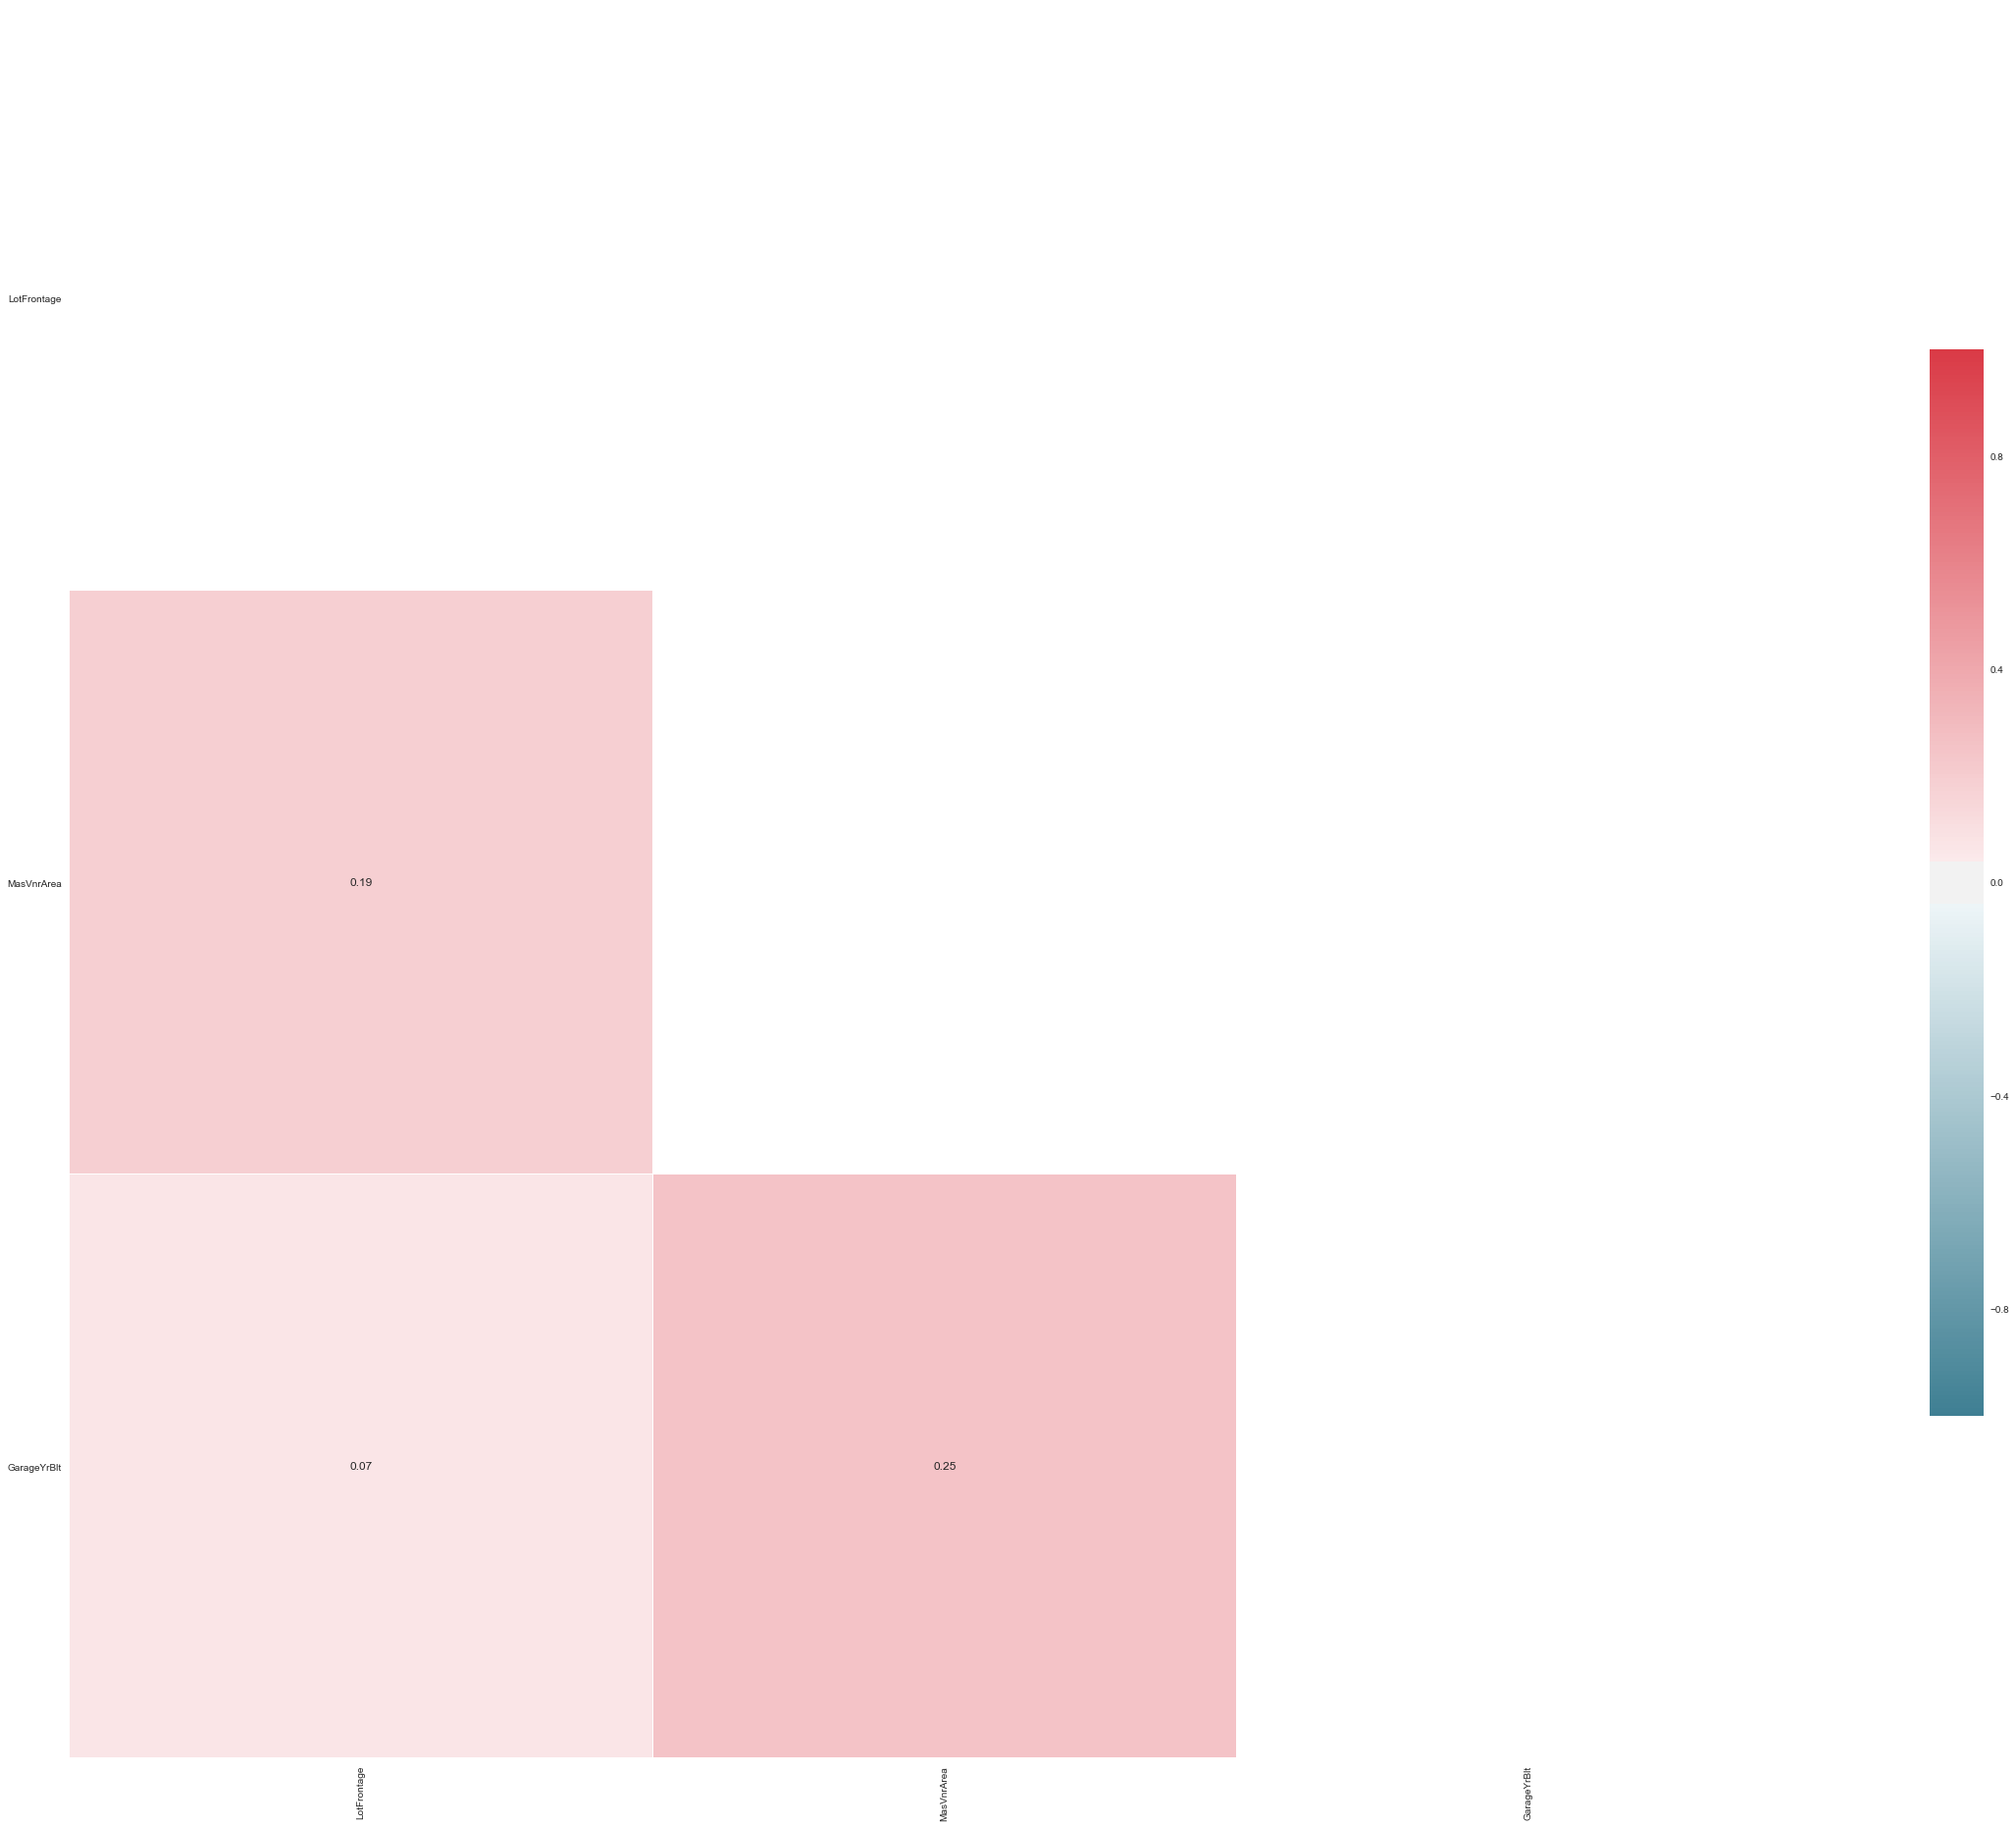

In [27]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[continuous_features].corr().round(2)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

plt.show()

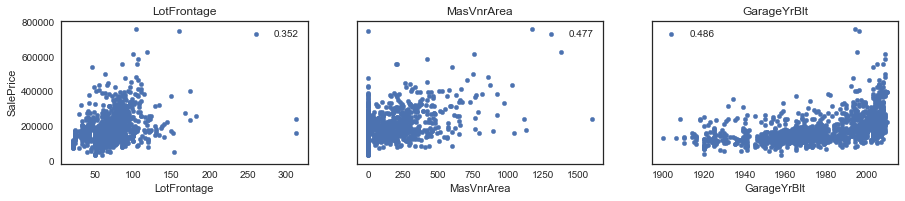

In [28]:
# Correlation of continuous variables with SalePrice, plotted.

fig, axes = plt.subplots(nrows=13, ncols=3, sharey=True, figsize=(15, 50))
fig.subplots_adjust(hspace = 0.5)

axes_list = [item for sublist in axes for item in sublist]

for feature in continuous_features:
    ax = axes_list.pop(0)
    
    df.plot(kind='scatter', x=feature, y='SalePrice', 
            label="%.3f" % df[[feature, 'SalePrice']].corr().as_matrix()[0,1], title=feature, ax=ax)

for ax in axes_list:
    ax.remove()  
    
plt.show()

In [29]:
df.to_csv('CleanedTrain.csv',index=False)

In [30]:
df_test =  pd.read_csv('test.csv')
df_test = df_test.drop(dropNaN,axis=1)
df_test = df_test.drop('Id',axis=1)
df_test.to_csv('CleanedTest.csv',index=False)

In [31]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


# 4 - Training The Models

# Linear Model - Isaac

# Random Forest - Xinyue

# Decision Tree - Ernest

## 4.4 Support Vector Machines (SVM) - Yiming

### 4.4.1 Check the training data

The data cleaning in chapter 1 is just a basic operations to the data, here we need to do more about it.

In [32]:
df_MLP = df.copy()
df_MLP.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
# Chose all Nan data

hasNaN = []
for c in df_MLP.columns:
    if df_MLP[c].isnull().sum() > 0:
        hasNaN.append(c)
        print(c," missing values count:",df_MLP[c].isnull().sum(), df_MLP[c].dtype)

LotFrontage  missing values count: 259 float64
MasVnrType  missing values count: 8 category
MasVnrArea  missing values count: 8 float64
BsmtQual  missing values count: 37 category
BsmtCond  missing values count: 37 category
BsmtExposure  missing values count: 38 category
BsmtFinType1  missing values count: 37 category
BsmtFinType2  missing values count: 38 category
Electrical  missing values count: 1 category
GarageType  missing values count: 81 category
GarageYrBlt  missing values count: 81 float64
GarageFinish  missing values count: 81 category
GarageQual  missing values count: 81 category
GarageCond  missing values count: 81 category


We can see that after data cleaning, some columns still have null value. But the perctange of null value is not many,(all less than 30%). So here I use imputation to hadnle the missing value.

For the numerical column, I use mean  of the column to replace the missing value, for those non-numerical columns, I use the most frequently value to replace the missing values.

#### 4.4.1.1 Imputation

In [47]:
# List all numerical and non-numerical columns that contaion missing value
miss_numerical = ['LotFrontage','MasVnrArea', 'GarageYrBlt']
miss_non_numerical = [x for x in hasNaN if x not in miss_numerical]


# Use the mean data to replace the missing value 
for column in miss_numerical:
    ave = df_MLP[column].mean()
    df_MLP[column] = df_MLP[column].replace(np.nan, ave)

    
# Use the most frequently data to replace the missing value 
for column in miss_non_numerical:
    fre = df_MLP[column].value_counts().idxmax()
    df_MLP[column] = df_MLP[column].replace(np.nan, fre)

#### 4.4.1.2 Convert the non-numerical features to numerical

We choose binary conding ways to convert non-numerical features to numerical.

In [35]:
# create a model
df_MLP_feature = df_MLP.drop(columns=['SalePrice'])

numerical = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',\
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',\
            'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','GarageArea', 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']


non_numerical = [x for x in df_MLP_feature if x not in numerical]
non_numerical_dummy = pd.get_dummies(df_MLP_feature, columns =non_numerical)
result = pd.concat([df_MLP_feature[numerical], non_numerical_dummy], axis = 1)

In [48]:
result.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_

#### 4.4.1.3 Normalization

Because the range of each features is quite different. Some are less than 10 but some are higher than 10000. If we just use these raw data, it will cause bad effect to our model, so we need to normalize the data.

The common way to do normalization is z-score and Min-Max Normalization. Because we haven't done anythong to the outliers and Min-Max Normalization is senstive to these outliers. So I choose z-score to do the normalization.

In [36]:
# Here we use the zscore function from scipy
from scipy.stats import zscore

# perfoem z-score operation
X = result.apply(zscore)

# Print the shape of training data
print('The size of trainning data is ', X.shape)
X.head()

The size of trainning data is  (1460, 306)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functi

#### 4.4.1.4 Create the MLPRegressor model

In [49]:
# import the svm module
from sklearn import svm
y = df_MLP['SalePrice'].values

# set the paramaters of the model
clf = svm.SVR(C=50000.0,  kernel='poly',shrinking =False, cache_size=500, degree=25, coef0 = 5)

# training the model
clf.fit(X, y)

SVR(C=50000.0, cache_size=500, coef0=5, degree=25, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [50]:
# precidtc x value
predicted_y = clf.predict(X)
predicted_y

array([208500.13038968, 181500.09606458, 223500.03991934, ...,
       266499.91174223, 142125.17238183, 147499.92875086])

In [51]:
# Get the R-sqared of the model
clf.score(X, y)

0.9999999999980144

In [40]:
# Get the mean squared error of the model
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(y, predicted_y))
print(rms)

0.10136571588615197


We can see that the outcome of R-squared is very good, almost clost to 1.0 and the mean square error is relative low. So the following I'll use test data to test the model.

#### 4.4.1.5 Clean the test data

Likewise, the test data is not perfect, neither. There are some missing values, we use same ways to handle the problem.

In [52]:
df_MLP_test = df_test.copy()
df_MLP_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [53]:
hasNaN = []
for c in df_MLP_test:
    if df_MLP_test[c].isnull().sum() > 0:
        hasNaN.append(c)
        print(c," missing values count:",df_MLP_test[c].isnull().sum(), df_MLP_test[c].dtype)

MSZoning  missing values count: 4 object
LotFrontage  missing values count: 227 float64
Utilities  missing values count: 2 object
Exterior1st  missing values count: 1 object
Exterior2nd  missing values count: 1 object
MasVnrType  missing values count: 16 object
MasVnrArea  missing values count: 15 float64
BsmtQual  missing values count: 44 object
BsmtCond  missing values count: 45 object
BsmtExposure  missing values count: 44 object
BsmtFinType1  missing values count: 42 object
BsmtFinSF1  missing values count: 1 float64
BsmtFinType2  missing values count: 42 object
BsmtFinSF2  missing values count: 1 float64
BsmtUnfSF  missing values count: 1 float64
TotalBsmtSF  missing values count: 1 float64
BsmtFullBath  missing values count: 2 float64
BsmtHalfBath  missing values count: 2 float64
KitchenQual  missing values count: 1 object
Functional  missing values count: 2 object
GarageType  missing values count: 76 object
GarageYrBlt  missing values count: 78 float64
GarageFinish  missing valu

In [54]:
# List all numerical and non-numerical columns that contaion missing value
miss_numerical = ['LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
                  'BsmtFullBath','BsmtHalfBath','BsmtHalfBath','GarageYrBlt','GarageYrBlt','GarageCars','GarageArea']

miss_non_numerical = [x for x in hasNaN if x not in miss_numerical]


# Use the mean data to replace the missing value 
for column in miss_numerical:
    ave = df_MLP_test[column].mean()
    df_MLP_test[column] = df_MLP_test[column].replace(np.nan, ave)

    
# Use the most frequently data to replace the missing value 
for column in miss_non_numerical:
    fre = df_MLP_test[column].value_counts().idxmax()
    df_MLP_test[column] = df_MLP_test[column].replace(np.nan, fre)

    
non_numerical_dummy_test = pd.get_dummies(df_MLP_test, columns = non_numerical)

result = pd.concat([df_MLP_test[numerical], non_numerical_dummy_test], axis = 1)

X_test = result.drop('Utilities_AllPub',axis=1)

from scipy.stats import zscore
X_test = result.apply(zscore)
X_test['Utilities_AllPub'] = 1
print('The shape of X_test is ' ,X_test.shape)

The shape of X_test is  (1459, 290)


F:\Soft\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [55]:
for column in X:
    if column not in X_test:
        print(column)
        X_test[column] = 0

X_test.head(10)

Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
Electrical_Mix
GarageQual_Ex


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_

In [45]:
predicted_y_test = clf.predict(X_test)

predicted_y_test

array([136999.2745546 , 217445.67612864, 174879.52947169, ...,
       184432.81385954, 135955.56722235, 204938.92470479])

In [46]:
index = np.arange(1461,2920)

# predicted_y_test = np.transpose(predicted_y_test)

svm_outcome = pd.DataFrame(predicted_y_test,columns=['SalePrice'], index=index)

# svm_outcome = pd.DataFrame(data={'SalePrice',predicted_y_test}, index=index)
svm_outcome.to_csv('svm_predicted.csv',index_label='Id')